<div>
    <div style="width: 70%; float: left">
        <h1>Intelligence artificielle et Celeste </h1>
        <h4>Réalisé par : Samir Belfaquir, Romain Corbeau, Tristan LeSaux et Nicolas Dupré-Pawlak</h4>
    </div>
    <img style="width:20%; height: auto;" src="img/CelesteLogo.png">
</div>


<h1> Présentation du projet </h1>

<h2>Démonstration du jeu</h2>

<div>
    <h1> Lancement du projet avec un random agent</h1>
</div>

In [1]:
import retro

def main():
    env = retro.make(game='Celeste-GBA', state='Level1')
    obs = env.reset()
    while True:
        obs, rew, done, info =  env.step(env.action_space.sample())
        env.render()
        if done:
            obs = env.reset()
    env.close()


#if __name__ == "__main__":
    #main()

<h1>Résultat attendu : </h1>

In [45]:
from IPython.display import HTML

def show_celeste_video():
    return HTML("""
    <div align="middle">
        <video width="50%" controls>
            <source src="records/MP4/randomRun.mp4" type="video/mp4">
        </video>
    </div>
    """)

In [46]:
show_celeste_video()

<h1> Nouveautés: </h1>

<h3> Réseau neuronal </h3>

<h3> Policy forward / backward </h3>

<h3> Inputs </h3>

<h1> Réseau neuronal </h1>

<h1> Policy forward / Backward </h1>

<h1> Inputs </h1>

<div>
    <h3> Les types d'actions de gym retro </h3>
    <ul>
        <li>Discret</li>
        <li>Multi Discret</li>
        <li>Multi Binaire</li>
    </ul>
</div>

<div>
    <h3> Discret </h3>
    <table>
        <tr style="background: transparent">
            <td style="text-align: center"> Gauche: </td>
            <td> <img src="img/toucheD.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Saut: </td>
            <td> <img  src="img/toucheX.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Gauche + Saut  </td>
            <td> <img src="img/toucheA.png" /> </td>
        </tr>
    </table>
</div>

<div>
    <h3> Multi Discret </h3>
    <table>
        <tr style="background: transparent">
            <td style="text-align: center"> Gauche: </td>
            <td> <img src="img/toucheD.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Saut: </td>
            <td> <img src="img/toucheX.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Gauche + Saut:  </td>
            <td> <img style="display: inline" src="img/toucheD.png" /> <span style="font-size: 2em"> + </span> <img style="display: inline; margin-top: 0;" src="img/toucheX.png" /> </td>
        </tr>
    </table>
</div>

<div>
    <h3> Multi Binaire </h3>
    <table>
        <tr style="background: transparent">
            <td style="text-align: center"> Gauche: </td>
            <td> <img src="img/toucheD.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Saut: </td>
            <td> <img src="img/toucheX.png" /> </td>
        </tr>
        <tr style="background: transparent">
            <td style="text-align: center"> Saut + Gauche:  </td>
            <td> <img style="display: inline" src="img/toucheA.png" /> <span style="font-size: 2em"> = </span> <img style="display: inline" src="img/toucheD.png" /> <span style="font-size: 2em"> + </span> <img style="display: inline" src="img/toucheX.png" /></td>
        </tr>
    </table>
</div>

<h3> Les inputs de la GBA </h3>
<br />
<img src="img/inputs.png" />


In [ ]:
# On choisit l'input en fonction de l'aprob renvoyé par le réseau neuronal en le comparant à un nombre aléatoire.
# Pour l'axe horizontal, on choisit arbitrairement un coté (droite ou gauche) mais on c'est toujours le même en fonction de l'aprob.
elem1 = 1 if np.random.uniform() < aprob1 else 2

# Pareil pour l'axe vertical
elem2 = 1 if np.random.uniform() < aprob2 else 2

# Ici, on choisit soit de dash, soit de sauter soit de rien faire.
# Le saut dash est une action possible mais inutile donc on l'ignore
elem31 = 1 if np.random.uniform() < aprob3 else 0
elem32 = 2 if np.random.uniform() < aprob3 else 0

if elem31 != 0 and elem32 != 0:
    elem3 = 4
elif elem31 == 1:
    elem3 = 1
elif elem32 == 2:
    elem3 = 2 
else:
    elem3 = 0

# Les touches L et R sont inutiles, pas besoin de créer un nouveau réseau neuronal, donc on ignore.
a = [elem1, elem2, elem3, 0]


# On demande au simulateur d'effectuer l'action choisit.
observation, reward, done, info = env.step(a)


<h1> Difficultés rencontrées </h1>

<li> Récupération des inputs </li>

<li> Rewards manquantes </li>

<li> Implémentation du temps pour le reward mean </li>

<h1> Démonstration </h1>

<img src="img/madeline.jpg" />

<h1> Résultats après plusieurs heures </h1>

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import json

def show_graph():

    total_reward_sum = []
    total_running_rewards = []

    with open('records/runRewardRecords.json') as json_file:
        file_data = json.load(json_file)
        for elem in file_data['records']:
            total_reward_sum.append(elem['rewardSum'])
            total_running_rewards.append(elem['runningReward'])

    fig, ax = plt.subplots()
    #plt.scatter(total_reward_sum, total_running_rewards, "ko-")
    plt.plot(total_reward_sum, total_running_rewards, ls="-")
    ax.set_title('Evolution des rewards au fil des runs')
    ax.set_xlabel('Reward sum')
    ax.set_ylabel('Running reward')
    plt.show()

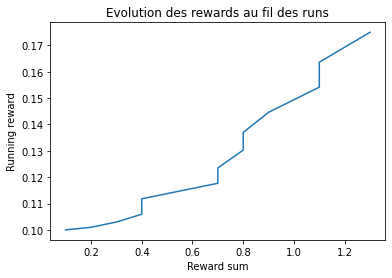

In [56]:
show_graph()

<h1>Sources</h1>

<a href="https://www.numerama.com/sciences/175191-google-motive-ia-joue-mieux-a-vieux-jeu-atari.html">Google motive son IA pour qu’elle joue mieux à un vieux jeu Atari</a> <br />
<a href="https://arxiv.org/pdf/1606.01868v1.pdf">Unifying Count-Based Exploration and Intrinsic Motivation</a> <br />
<a href="https://k-actus.net/index.php/2018/11/21/lia-sattaque-aux-jeux-atari-2600/">L’IA s’attaque aux jeux Atari 2600</a> <br />
<a href="https://arxiv.org/pdf/1708.07902v3.pdf">Deep Learning for Video Game Playing</a> <br />
<a href="https://retro.readthedocs.io/en/latest/getting_started.html"> Gym Retro by OpenAI </a> <br />
<a href="https://karpathy.github.io/2016/05/31/rl/">Deep Reinforcement Learning: Pong from Pixels</a><br />
<a href="https://github.com/JeffRuLz/Celeste-Classic-GBA"> Celeste version GBA </a><br />
<a href="https://www.thinkopen.it/en/project/artificial-intelligence-state-of-the-art/">Artificial Intelligence: state of the art</a><br />
<a href="https://medium.com/aureliantactics/integrating-new-games-into-retro-gym-12b237d3ed75">Integrating New Games into Retro Gym</a><br />
<a href="https://courspython.com/apprendre-numpy.html">Introduction à NumPy</a><br />
<a href="https://spinningup.openai.com/en/latest/">Welcome to Spinning Up in Deep RL!</a><br />
<a href="https://moox.io/blog/keep-in-sync-git-repos-on-github-gitlab-bitbucket/">Keep in sync your Git repos on GitHub, GitLab & Bitbucket</a><br />
<a href="https://stable-baselines3.readthedocs.io/en/master/">Stable-Baselines3 Docs - Reliable Reinforcement Learning Implementations</a><br />
<a href="https://makina-corpus.com/blog/metier/2017/initiation-au-machine-learning-avec-python-theorie">Initiation au Machine Learning avec Python - La théorie</a><br />
<a href="https://medium.com/emergent-future/spam-detection-using-neural-networks-in-python-9b2b2a062272">Spam detection using neural networks in Python</a><br />
<a href="https://blog.octo.com/apprentissage-par-renforcement-de-la-theorie-a-la-pratique/">Apprentissage par renforcement – de la théorie à la pratique</a><br />
<a href="https://github.com/openai/retro/blob/master/retro/examples/discretizer.py">Gym retro - Discretizer</a><br />
<a href="https://github.com/openai/retro-baselines/blob/master/agents/sonic_util.py"> Gym retro - Sonic</a><br />
<a href="https://github.com/openai/gym/blob/master/gym/spaces/multi_discrete.py">Gym - Multi descretizer</a><br />